<a href="https://colab.research.google.com/github/Jinwooseol/Deep-learning/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#오차역전파 (Backpropagation Algorithm)
- 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함
- 각 layer별로 역전파학습을 위한 중간값을 저장
- 손실함수를 학습 파라미터(weight, bias)로 미분하여, 마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용해 미분
- 각 layer를 통과할 때마다 저장된 값을 이용
- Error를 전달하면서 학습 파라미터를 갱신

#오차역전파 학습의 특징
- 손실함수를 통한 평가를 한 번만 진행, 연쇄법칙을 이용한 미분을 활용  
  $\rightarrow$ **학습 소요시간이 매우 단축**
- 미분을 위한 중간값을 모두 저장하기 때문에 많은 메모리 사용

#신경망 학습에 있어서 미분가능성의 중요성
- 경사하강법(Gradient descent)에서 손실 함수의 최소값 (최적값)을 찾기 위해 **미분**을 활용
- 미분을 통해 손실 함수의 학습 파라미터를 갱신하여 모델의 가중치의 최적값을 찾는 과정

#합성함수의 미분 (연쇄법칙, chain rule)
>>$\frac{d}{dx}[f(g(x))] = f'(g(x))g'(x)$
- 여러 개를 연속으로 사용가능
$\frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times ... ~\times \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial x}$



덧셈, 곱셈 계층의 역전파
> 1. $z = x + y$ 일 때,  
$\frac{\partial z}{\partial x} = 1, \frac{\partial z}{\partial y} = 1$


>2. $t = xy$ 일 때,  
$\frac{\partial t}{\partial x} = y, \frac{\partial t}{\partial y} = x$

In [1]:
class Mul():

  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    result = x * y
    return result

  def backward(self, dresult):
    dx = dresult * self.y
    dy = dresult * self.x
    return dx, dy

In [12]:
class Add():

  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    result = x + y
    return result

  def backward(self, dresult):
    dx = dresult * 1
    dy = dresult * 1
    return dx, dy

In [13]:
a, b, c = -1, 3, 4
x = Add()
y = Add()
f = Mul()

In [14]:
x_result = x.forward(a, b)
y_result = y.forward(b, c)

print(x_result)
print(y_result)
print(f.forward(x_result, y_result))

2
7
14


In [15]:
dresult = 1
dx_mul, dy_mul = f.backward(dresult)

da_add, db_add_1 = x.backward(dx_mul)
db_add_2, dc_add = y.backward(dy_mul)

print(dx_mul, dy_mul)
print(da_add)
print(db_add_1 + db_add_2)
print(dc_add)

7 2
7
9
2


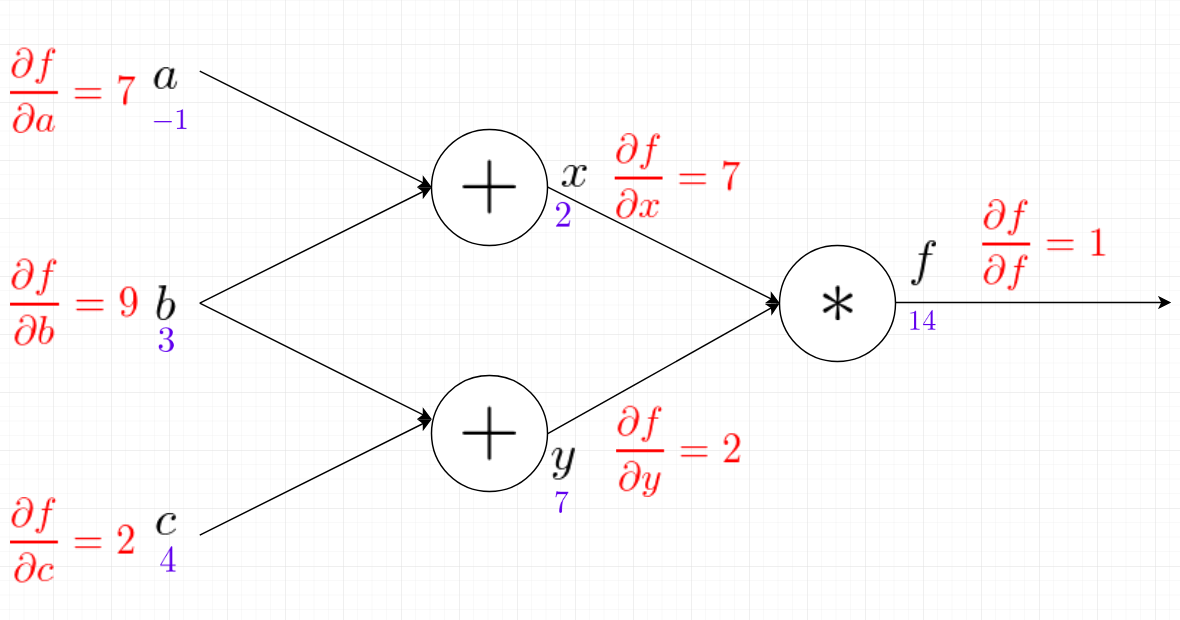

Reference: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c

#Activation Function에서의 역전파
- Sigmoid function
>$y = \frac{1}{1 + e^{-x}}$ 일 때,  
$y' = y(1 - y)$

In [18]:
import numpy as np

# Sigmoid function 구현
class Sigmoid():
  
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.dout
    return dx

- ReLU function  

>> $y = \left\{\begin{matrix}0
 & (x \le 0) \\x
 &  (x > 0)\\
\end{matrix}\right.$  

>> $y' = \left\{\begin{matrix}0
 & (x \le 0) \\1
 &  (x > 0)\\
\end{matrix}\right.$

In [19]:
class ReLU():

  def __init__(self):
    self.out = None

  def forward(self, x):
    self.mask = (x < 0)
    out = x.copy()
    out[x<0] = 0
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

#행렬 연산에 대한 역전파
> $ Y = X \bullet W + B$

순전파(Forward)
- 형상(shape)을 맞춰야함
- 곱셈, 덧셈 계층을 합친 형태

In [20]:
X = np.random.rand(3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape, W.shape, B.shape)


(3,) (3, 2) (2,)


In [21]:
Y = np.dot(X, W) + B
print(Y.shape)

(2,)


역전파(Backward)

$ Y = X \bullet W + B$
- $X: (2, )$
- $W: (2, 3)$
- $B: (3, )$
- $\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} \bullet W^T, ~(2, )$
- $\frac{\partial L}{\partial W} = X^T \bullet \frac{\partial L}{\partial Y}, (2, 3)$
- $\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y}, (3, )$

In [22]:
X = np.random.randn(2)
W = np.random.randn(2, 3)
B = np.random.randn(3)
Y = np.dot(X, W) + B

print("X\n{}".format(X))
print("W\n{}".format(W))
print("B\n{}".format(B))
print("Y\n{}".format(Y))

X
[ 0.64222949 -0.51602227]
W
[[ 0.61200285 -0.95451013  1.16159028]
 [ 1.6240732  -0.61513585 -1.43294708]]
B
[1.27622168 1.45081952 0.08552042]
Y
[0.83121001 1.15522876 1.57096056]


In [24]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1, 1), dL_dY.reshape(1, -1))
dL_dB = dL_dY

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_dB\n{}".format(dL_dB))

dL_dY
[-0.79497385 -1.20675174  0.85718261]
dL_dX
[ 1.6610255  -1.77707679]
dL_dW
[[-0.51055565 -0.77501156  0.55050795]
 [ 0.41022421  0.62271077 -0.44232532]]
dL_dB
[-0.79497385 -1.20675174  0.85718261]


#배치용 행렬 내적 계층
- N개의 데이터에 대하여
>$ Y = X \bullet W + B$  
  - $X: (N, 3)$
  - $W: (2, 3)$
  - $B: (2, )$

In [30]:
X = np.random.randn(4, 3)
W = np.random.randn(3, 2)
B = np.random.randn(2)
Y = np.dot(X, W) + B  # forward

print(X.shape)
print(W.shape)
print(B.shape)
print(Y.shape)

(4, 3)
(3, 2)
(2,)
(4, 2)


In [31]:
print("X\n{}".format(X))
print("W\n{}".format(W))
print("B\n{}".format(B))
print("Y\n{}".format(Y))

X
[[-0.95199669  0.59257606 -0.82076141]
 [ 2.20948531 -2.52944964 -0.43981164]
 [-1.24442686  0.59893332 -0.34351531]
 [-1.12906303 -0.0790558   0.70343515]]
W
[[ 0.70827088  0.27428613]
 [-1.10549004  0.96026758]
 [-1.07826651 -0.03718187]]
B
[-0.74705974 -0.12095274]
Y
[[-1.19141866  0.21747679]
 [ 4.08836992 -1.92751702]
 [-1.92016483  0.12562702]
 [-2.21783737 -0.53270883]]


In [32]:
# Backward

dL_dY = np.random.randn(4, 2)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.T, dL_dY)
dL_dB = np.sum(dL_dY, axis=0)

print("dL_dY\n{}".format(dL_dY))
print("dL_dX\n{}".format(dL_dX))
print("dL_dW\n{}".format(dL_dW))
print("dL_dB\n{}".format(dL_dB))

dL_dY
[[ 0.52022779 -0.94554121]
 [ 0.08811995 -0.1802554 ]
 [-0.3398219   0.68702022]
 [-0.96675292  1.53671958]]
dL_dX
[[ 0.10911335 -1.4830792  -0.52578721]
 [ 0.01297124 -0.27050914 -0.08831456]
 [-0.05224584  1.03539297  0.34087388]
 [-0.26322207  2.5443977   0.98527919]]
dL_dW
[[ 1.21385309 -2.08811923]
 [-0.04172368  0.18563457]
 [-1.02905303  1.70032276]]
dL_dB
[-0.69822708  1.09794319]


In [33]:
class Layer():

  def __init__(self):
    self.W = np.random.randn(3, 2)
    self.b = np.random.randn(2)
    self.x = None
    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b
    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)
    return dx

In [34]:
np.random.seed(111)

layer = Layer()


In [36]:
X = np.random.randn(2, 3)
Y = layer.forward(X)

print(X)
print(Y)

[[-1.02796733 -0.09098625  0.492003  ]
 [ 0.4246722   1.28304882  0.31598645]]
[[ 0.58274531 -0.9429515 ]
 [ 1.13062323 -0.79211313]]


In [38]:
dout = np.random.randn(2, 2)
dout_dx = layer.backward(dout)

print(dout_dx)

[[ 2.07827838 -2.66980572  1.09288421]
 [ 1.27235104 -1.31566939 -0.85570599]]


#MNIST 분류 with 역전파

In [128]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from collections import OrderedDict

In [134]:
np.random.seed(42)

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10

#데이터 전처리

In [135]:
x_train, x_test = x_train.reshape(-1, 28 * 28).astype(np.float32), x_test.reshape(-1, 28*28).astype(np.float32)

x_train /= .255
x_test /= .255

y_train = np.eye(num_classes)[y_train]

In [136]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000,)


#Hyper parameter

In [137]:
epochs = 1000
lr = 1e-3     # learning rate
batch_size = 100
train_size = x_train.shape[0]

#Util functions

In [138]:
def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

  x = x - np.max(x)
  return np.exp(x) / np.sum(np.exp(x))

def MSE(pred_y, true_y):    # Mean Squared Error
  return np.sum((pred_y - true_y)**2) / pred_y.shape[0]

def CEE(pred_y, true_y):
  if pred_y.ndim == 1:
    true_y = true_y.reshape(1, true_y.size)
    pred_y = pred_y.reshape(1, pred_y.size)

  if true_y.size == pred_y.size:
    true_y = true_y.argmax(axis=1)

  batch_size = pred_y.shape[0]
  return -np.sum(np.log(pred_y[np.arange(batch_size), true_y] + 1e-7)) / batch_size

def softmax_loss(X, true_y):
  pred_y = softmax(X)
  return CEE(pred_y, true_y)



In [139]:
class Sigmoid():
  
  def __init__(self):
    self.out = None

  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.dout
    return dx

In [140]:
class ReLU():

  def __init__(self):
    self.out = None

  def forward(self, x):
    self.mask = (x < 0)
    out = x.copy()
    out[x<0] = 0
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

In [141]:
class Layer():

  def __init__(self, W, b):
    self.W = W
    self.b = b

    self.x = None
    self.origin_x_shape = None
    
    self.dL_dW = None
    self.dL_db = None

  def forward(self, x):
    self.origin_x_shape = x.shape

    x = x.reshape(x.shape[0], -1)
    self.x = x
    out = np.dot(self.x, self.W) + self.b
    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dL_dW = np.dot(self.x.T, dout)
    self.dL_db = np.sum(dout, axis=0)
    dx = dx.reshape(*self.origin_x_shape)
    return dx

In [142]:
class Softmax():

  def __init__(self):
    self.loss = None
    self.y = None     # 최종 출력
    self.t = None     # One hot encoding 정답 label

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = CEE(self.y, self.t)

    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    
    if self.t.size == self.y.size:
      dx = (self.y - self.t) / batch_size
    else:
      dx = self.y.copy()
      dx[np.arange(batch_size), self.t] -= 1
      dx = dx / batch_size

    return dx

In [143]:
class MyModel():

  def __init__(self, input_size, hidden_size_list, output_size, activation='relu'):
    self.input_size = input_size
    self.output_size = output_size
    self.hidden_size_list = hidden_size_list
    self.hidden_layer_num = len(hidden_size_list)
    self.params = {}

    self.__init_weights(activation)

    activation_layer = {'sigmoid': Sigmoid, 'relu': ReLU}
    self.layers = OrderedDict()
    for idx in range(1, self.hidden_layer_num + 1): 
      self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)], self.params['b' + str(idx)])
      self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

    idx = self.hidden_layer_num + 1

    self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)], self.params['b' + str(idx)])

    self.last_layer = Softmax()

  def __init_weights(self, activation):
    weight_std = None
    all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
    
    for idx in range(1, len(all_size_list)):
      if activation.lower() == "relu":
        weight_std = np.sqrt(2.0 / self.input_size) # 초기화 값
      elif activation.lower() == "sigmoid":
        weight_std = np.sqrt(1.0 / self.input_size) # 초기화 값

      self.params['W' + str(idx)] = weight_std * np.random.randn(all_size_list[idx-1], all_size_list[idx])
      self.params['b' + str(idx)] = np.random.randn(all_size_list[idx])

  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)

    return x
  
  def loss(self, x, true_y):
    pred_y = self.predict(x)

    return self.last_layer.forward(pred_y, true_y)

  def accuracy(self, x, true_y):
    pred_y = self.predict(x)
    pred_y = np.argmax(pred_y, axis=1)

    if true_y.ndim != 1:
      true_y = np.argmax(true_y, axis=1)

    accuracy = np.sum(pred_y == true_y) / float(x.shape[0])
    return accuracy

  def gradient(self, x, t):
    self.loss(x, t)

    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    grads = {}
    for idx in range(1, self.hidden_layer_num + 2):
      grads['W' + str(idx)] = self.layers['Layer' + str(idx)].dL_dW
      grads['b' + str(idx)] = self.layers['Layer' + str(idx)].dL_db

    return grads




In [157]:
# Model 생성 및 학습
model = MyModel(28*28, [100, 64, 32], 10, activation='relu')

In [158]:
train_lost_list = list()
train_acc_list = list()
test_acc_list = list()

In [159]:
for epoch in range(epochs):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  y_batch = y_train[batch_mask]

  grad = model.gradient(x_batch, y_batch)

  for key in model.params.keys():
    model.params[key] -= lr * grad[key]

  loss = model.loss(x_batch, y_batch)
  train_lost_list.append(loss)

  if epoch % 50 == 49:
    train_acc = model.accuracy(x_train, y_train)
    test_acc = model.accuracy(x_test, y_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("Epoch: {}, Train Accuracy: {:.3f}, Test Accuracy: {:.3f}".format(epoch + 1, train_acc, test_acc))

Epoch: 50, Train Accuracy: 0.545, Test Accuracy: 0.555
Epoch: 100, Train Accuracy: 0.666, Test Accuracy: 0.674
Epoch: 150, Train Accuracy: 0.724, Test Accuracy: 0.734
Epoch: 200, Train Accuracy: 0.761, Test Accuracy: 0.764
Epoch: 250, Train Accuracy: 0.790, Test Accuracy: 0.794
Epoch: 300, Train Accuracy: 0.806, Test Accuracy: 0.809
Epoch: 350, Train Accuracy: 0.819, Test Accuracy: 0.822
Epoch: 400, Train Accuracy: 0.830, Test Accuracy: 0.834
Epoch: 450, Train Accuracy: 0.837, Test Accuracy: 0.836
Epoch: 500, Train Accuracy: 0.845, Test Accuracy: 0.847
Epoch: 550, Train Accuracy: 0.851, Test Accuracy: 0.859
Epoch: 600, Train Accuracy: 0.860, Test Accuracy: 0.860
Epoch: 650, Train Accuracy: 0.863, Test Accuracy: 0.863
Epoch: 700, Train Accuracy: 0.872, Test Accuracy: 0.872
Epoch: 750, Train Accuracy: 0.872, Test Accuracy: 0.875
Epoch: 800, Train Accuracy: 0.876, Test Accuracy: 0.877
Epoch: 850, Train Accuracy: 0.879, Test Accuracy: 0.878
Epoch: 900, Train Accuracy: 0.883, Test Accuracy:

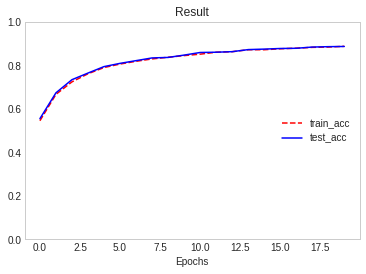

In [160]:
plt.plot(np.arange(1000//50), train_acc_list, 'r--', label='train_acc')
plt.plot(np.arange(1000//50), test_acc_list, 'b', label='test_acc')

plt.title('Result')
plt.xlabel('Epochs')
plt.ylim(0, 1)
plt.legend(loc=5)
plt.grid()
plt.show()

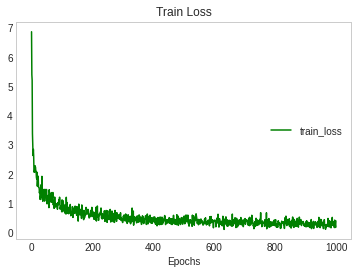

In [162]:
plt.plot(np.arange(1000), train_lost_list, 'g', label='train_loss')

plt.title('Train Loss')
plt.xlabel('Epochs')
plt.legend(loc=5)
plt.grid()
plt.show()